(i) how $L$ depends on $V$, keeping $σ/c_L$ constant

In [2]:
from scipy.optimize import approx_fprime
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define the function F
def F(L, V, D, gamma, sigma_cL):
    lambda_plus = (V / (2 * D)) * (1 + np.sqrt(1 + 4 * D * gamma / V**2))
    lambda_minus = (V / (2 * D)) * (1 - np.sqrt(1 + 4 * D * gamma / V**2))
    return np.exp(-lambda_minus * L) - np.exp(-lambda_plus * L) - (D * sigma_cL / gamma) * (lambda_plus - lambda_minus)

# Newton-Raphson method
def newton_raphson(F, L_init, V, D, gamma, sigma_cL, tol=1e-6, max_iter=1000):
    L = L_init  # Initial guess
    epsilon = 1e-6  # Small step for finite difference
    for _ in range(max_iter):
        F_val = F(L, V, D, gamma, sigma_cL)
        F_prime = approx_fprime([L], lambda x: F(x[0], V, D, gamma, sigma_cL), epsilon)[0]
        L_new = L - F_val / F_prime
        if abs(L_new - L) < tol:  # Convergence check
            return L_new
        L = L_new
    raise ValueError("Newton-Raphson did not converge within the maximum number of iterations.")


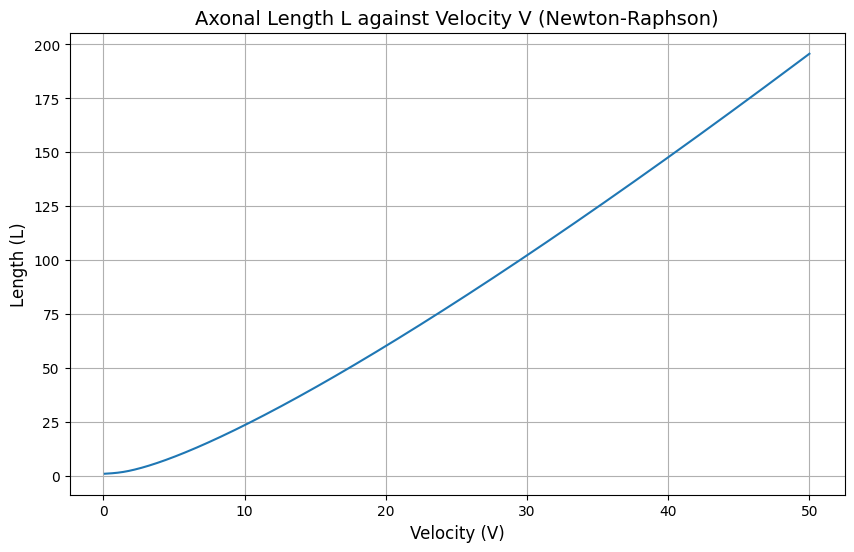

In [4]:
# Constants
D = 1
gamma = 1
sigma_cL = 1

# Velocity range
V_values = np.linspace(0.1, 50, 500)

# Solve for L for various V using Newton-Raphson
L_results_nr = []
L_init = 1  # Initial guess for L
for V in V_values:
    try:
        L_root = newton_raphson(F, L_init, V, D, gamma, sigma_cL)
        L_results_nr.append(L_root)
        L_init = L_root  # Use the previous solution as the initial guess for the next
    except ValueError:
        L_results_nr.append(np.nan)  # Replace failed cases with NaN

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(V_values, L_results_nr)
plt.xlabel('Velocity (V)', fontsize=12)
plt.ylabel('Length (L)', fontsize=12)
plt.title('Axonal Length L against Velocity V (Newton-Raphson)', fontsize=14)
plt.grid()
plt.show()

(ii) how $L$ depends on $σ/c_L$, keeping $V$ constant

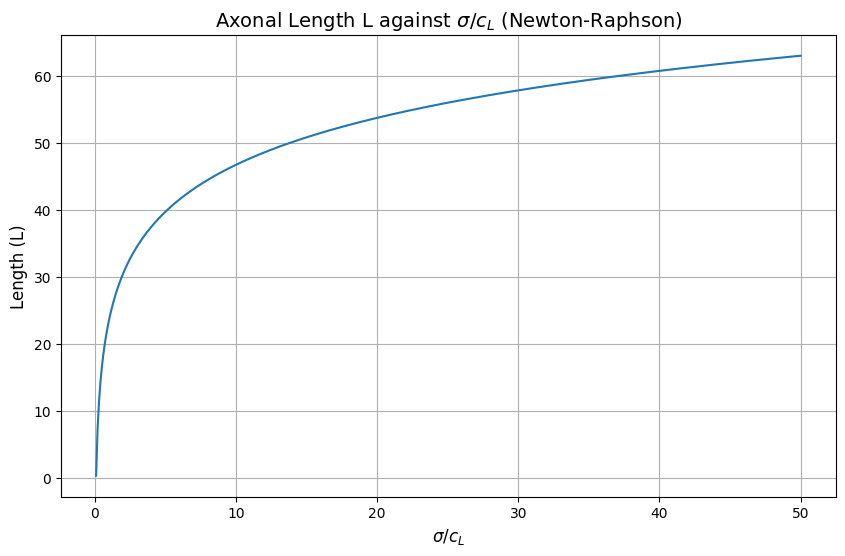

In [5]:
# Constants
D = 1
gamma = 1
V = 10

# Sigma/c_L range
sc_values = np.linspace(0.1, 50, 500)

# Solve for L for various sc using Newton-Raphson
L_results_nr = []
L_init = 1  # Initial guess for L
for sc in sc_values:
    try:
        L_root = newton_raphson(F, L_init, V, D, gamma, sc)
        L_results_nr.append(L_root)
        L_init = L_root  # Use the previous solution as the initial guess for the next
    except ValueError:
        L_results_nr.append(np.nan)  # Replace failed cases with NaN

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(sc_values, L_results_nr)
plt.xlabel('$\sigma / c_L$', fontsize=12)
plt.ylabel('Length (L)', fontsize=12)
plt.title('Axonal Length L against $\sigma / c_L$ (Newton-Raphson)', fontsize=14)
plt.grid()
plt.show()